In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
laptop = pd.read_csv("laptops_of_daraz.csv")

# Exploratory Data Analysis

In [58]:
laptop.shape

(1564, 12)

In [59]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             1564 non-null   int64  
 1   brand             1564 non-null   object 
 2   model             1564 non-null   object 
 3   processor         1564 non-null   float64
 4   ram memory        1564 non-null   int64  
 5   display size      1564 non-null   float64
 6   storage capacity  1564 non-null   int64  
 7   cpu cores         1564 non-null   int64  
 8   graphics card     1104 non-null   float64
 9   rating            1564 non-null   float64
 10  reviews           1564 non-null   int64  
 11  name              1564 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 146.8+ KB


In [60]:
laptop.describe()

,price,processor,ram memory,display size,storage capacity,cpu cores,graphics card,rating,reviews
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1104.000000,1564.000000,1564.000000
mean,123543.181586,5.475064,10.528133,14.912276,540.153453,6.565857,2326.231884,0.286957,0.230818
std,73742.517817,1.558320,5.081534,0.895630,269.053509,2.955440,924.762656,1.109482,2.194286
min,25500.000000,2.000000,4.000000,10.500000,64.000000,1.000000,0.000000,0.000000,0.000000
25%,73999.000000,5.000000,8.000000,14.000000,256.000000,4.000000,1650.000000,0.000000,0.000000
50%,104994.500000,5.000000,8.000000,15.600000,512.000000,6.000000,2800.000000,0.000000,0.000000
75%,150000.000000,7.000000,16.000000,15.600000,512.000000,8.000000,3050.000000,0.000000,0.000000
max,555555.000000,9.000000,32.000000,17.300000,2048.000000,24.000000,4070.000000,5.000000,73.000000


In [74]:
attributes = list(laptop.columns)
excluded_cols = ['brand', 'model', 'name']
numeric_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'price']
count_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name']
pair_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'brand', 'rating', 'reviews']
brand_cols = [col for col in attributes if col not in excluded_cols]

## Basic Visualization

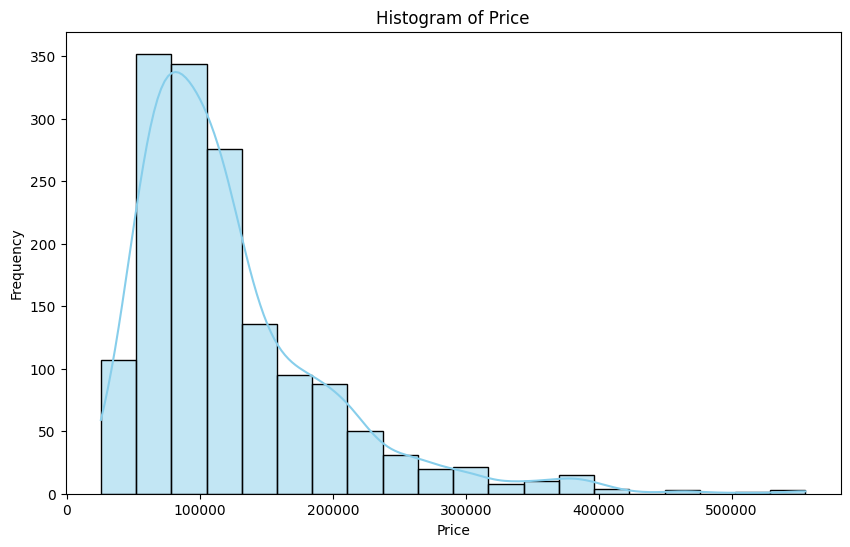

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


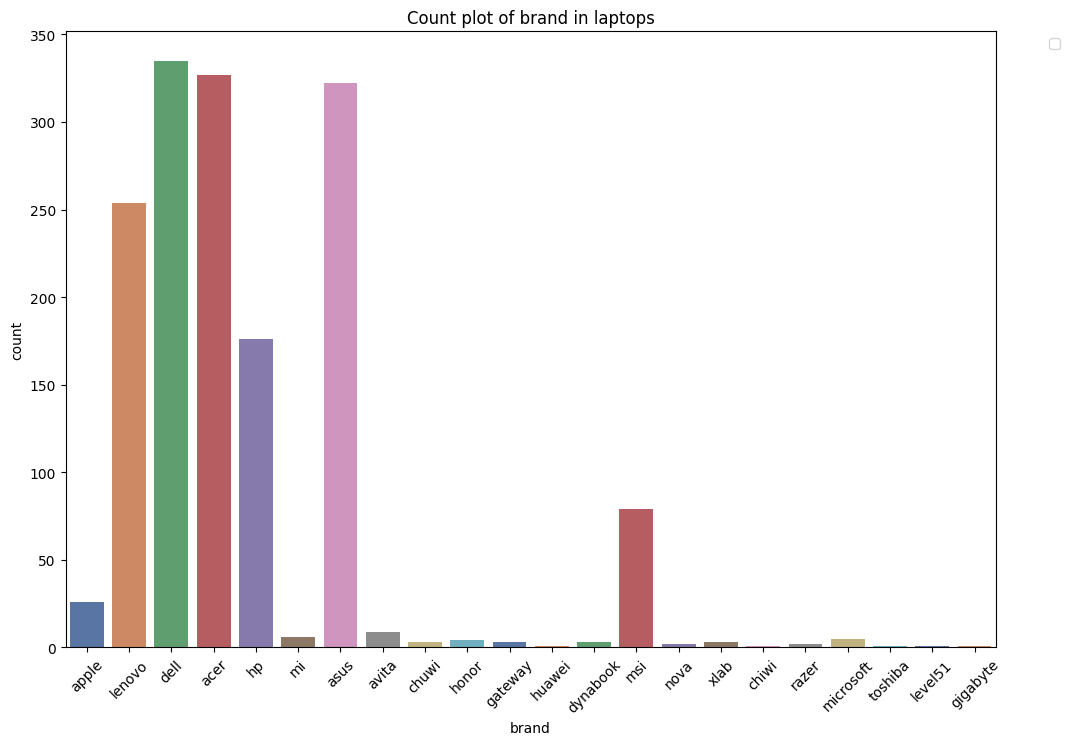

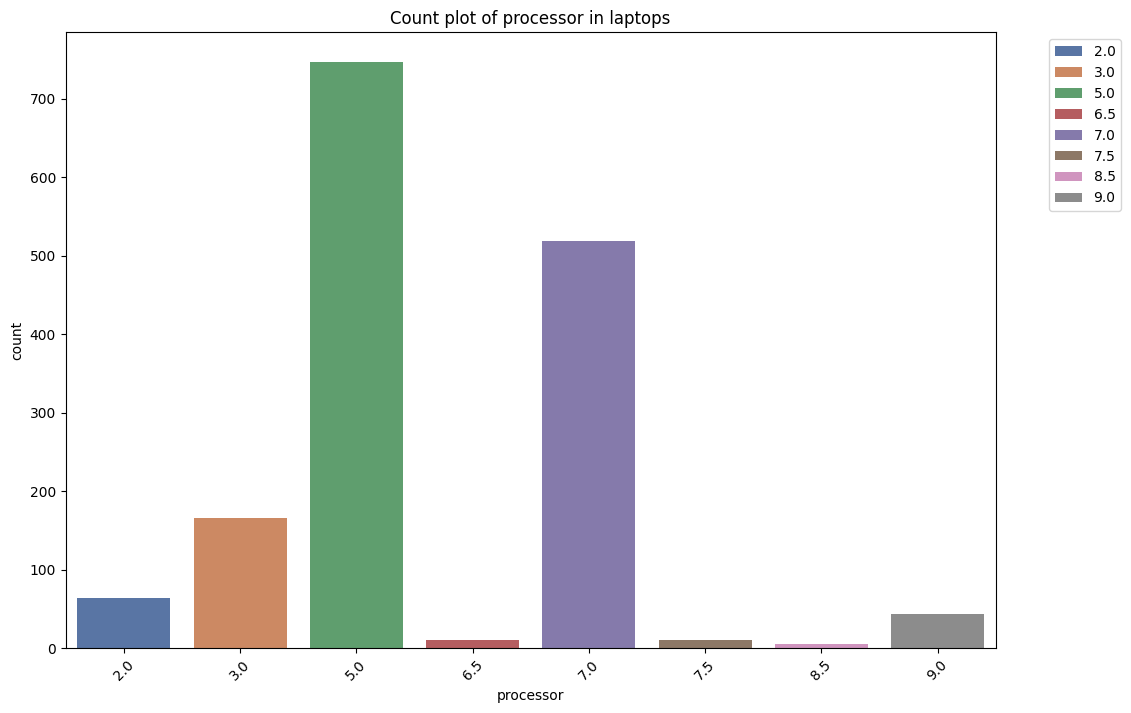

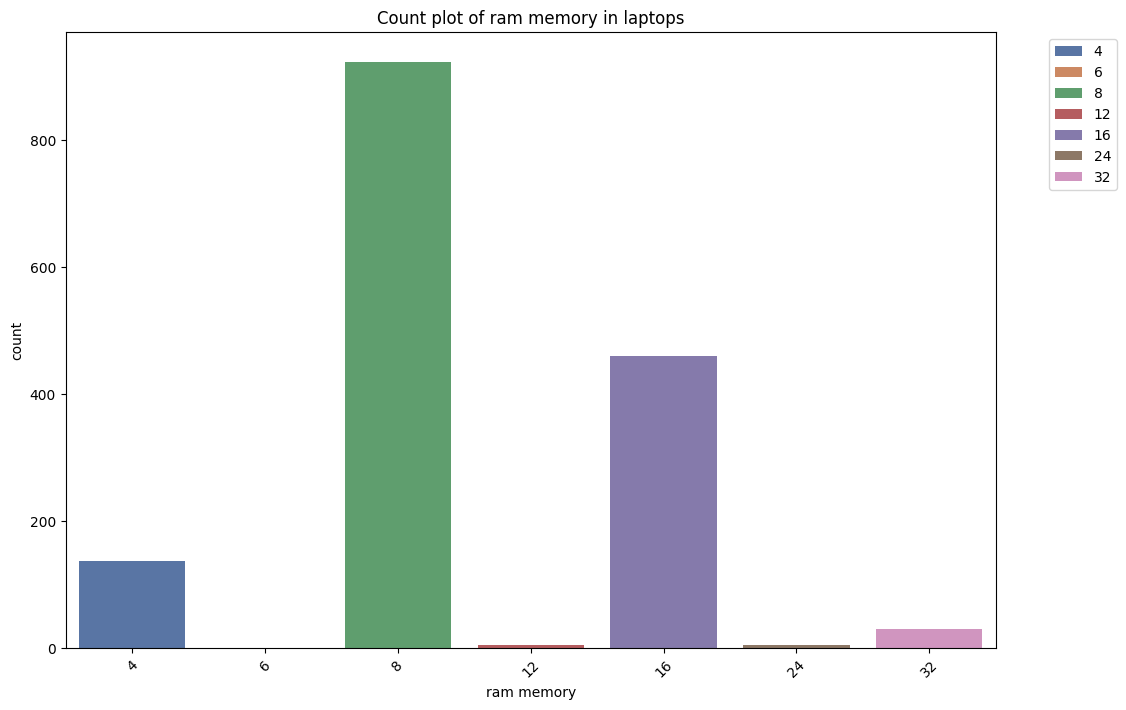

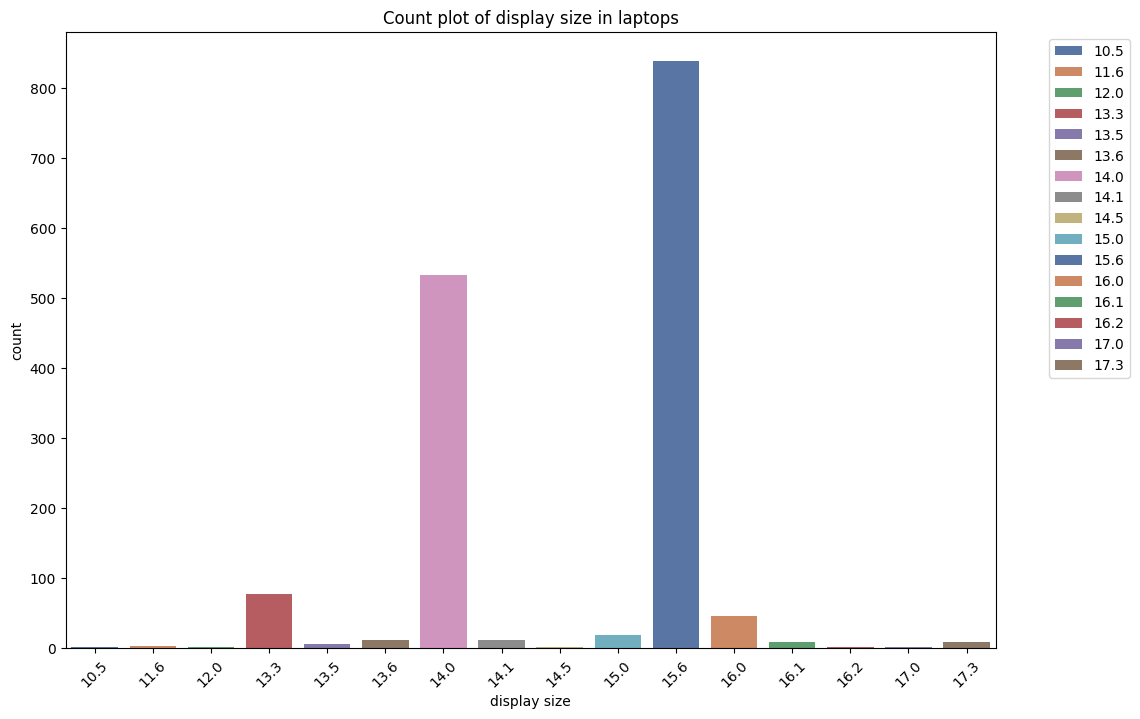

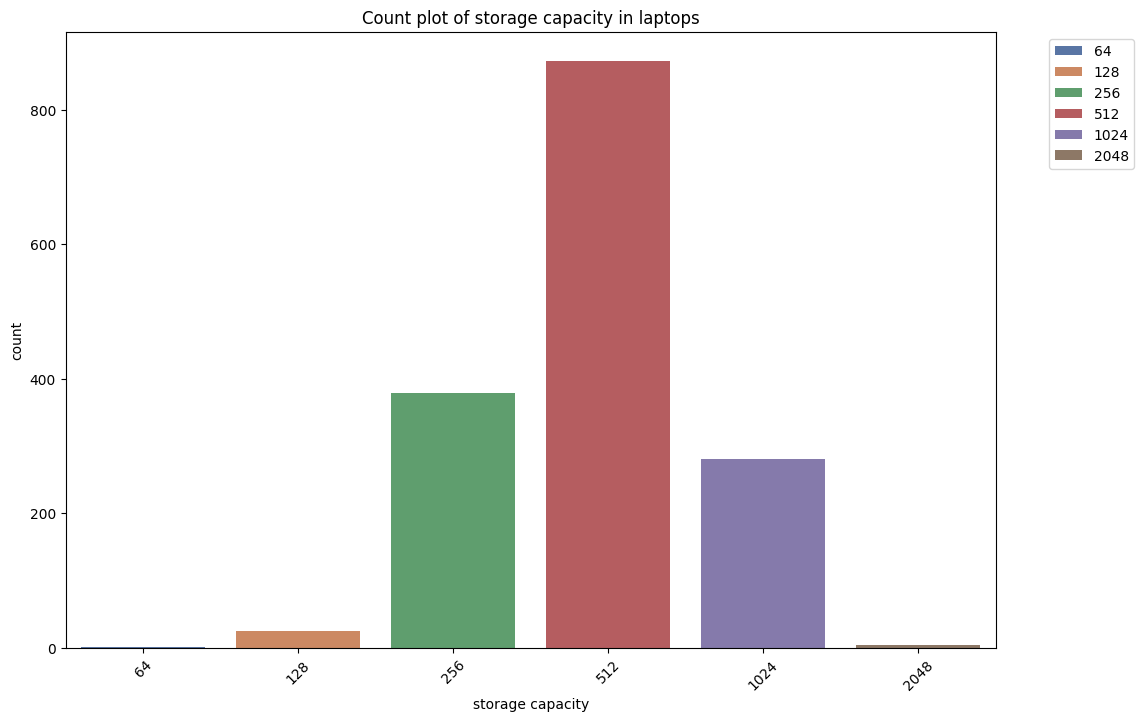

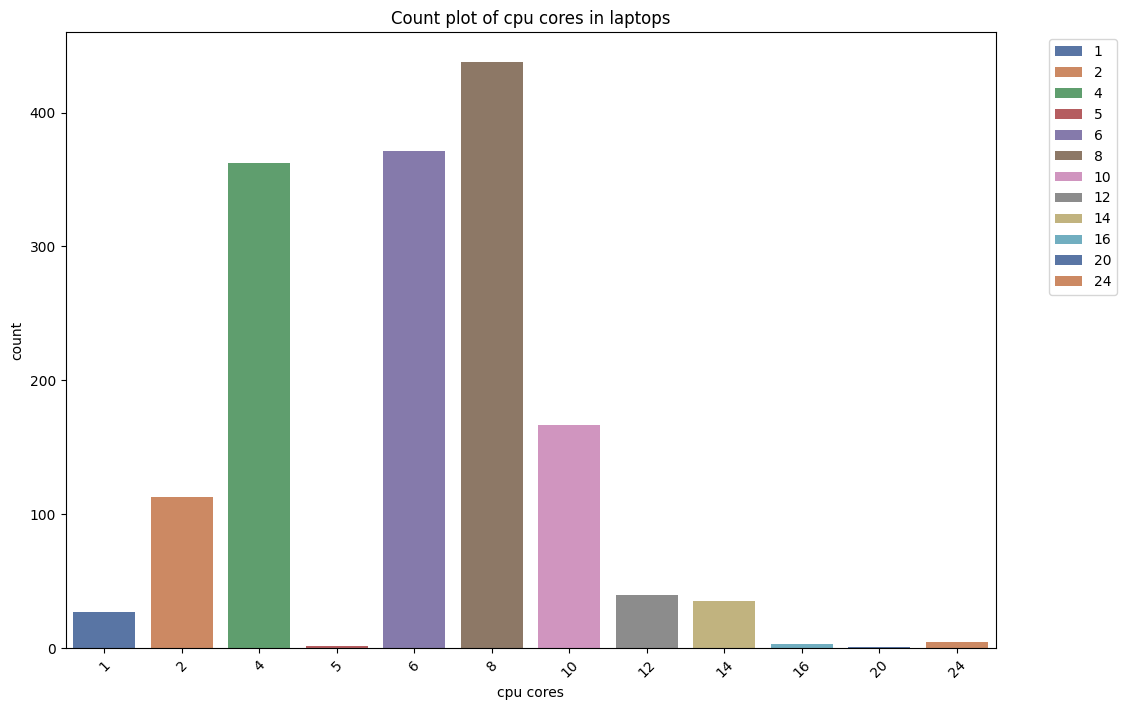

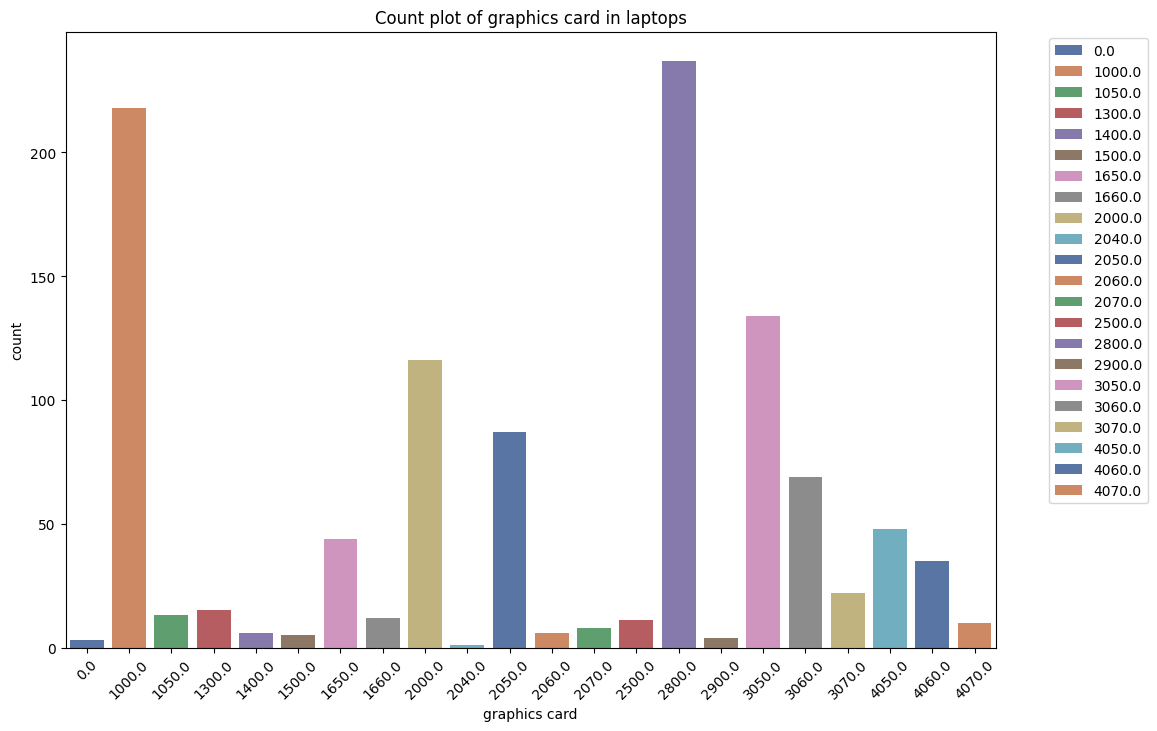

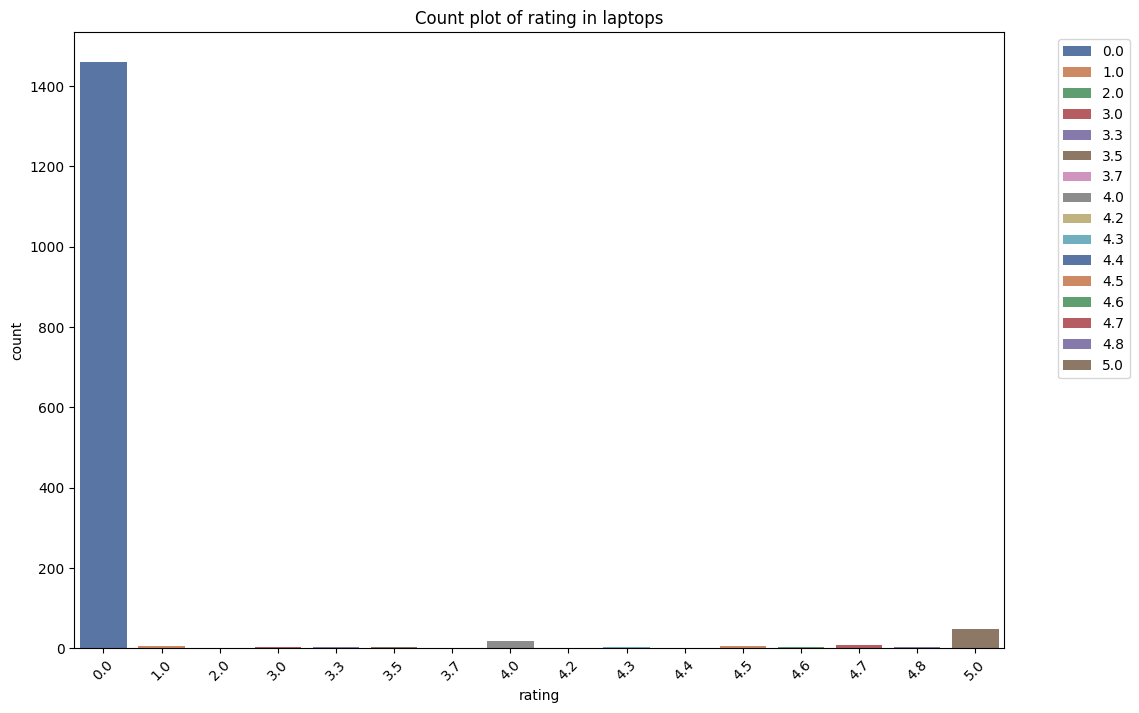

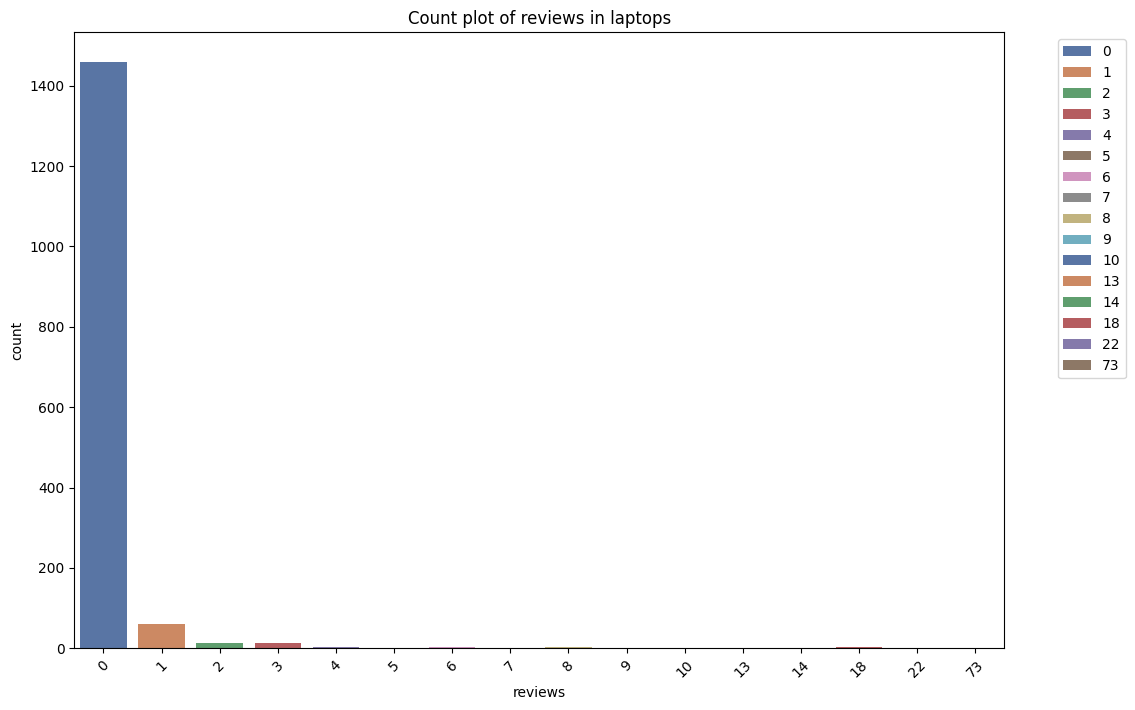

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=laptop, x='price', bins=20, color='skyblue', kde=True)
plt.title(f'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

for col in count_cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=laptop, x=col, hue=col, palette='deep')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"Count plot of {col} in laptops")
    plt.show()


## Brand-wise Analysis

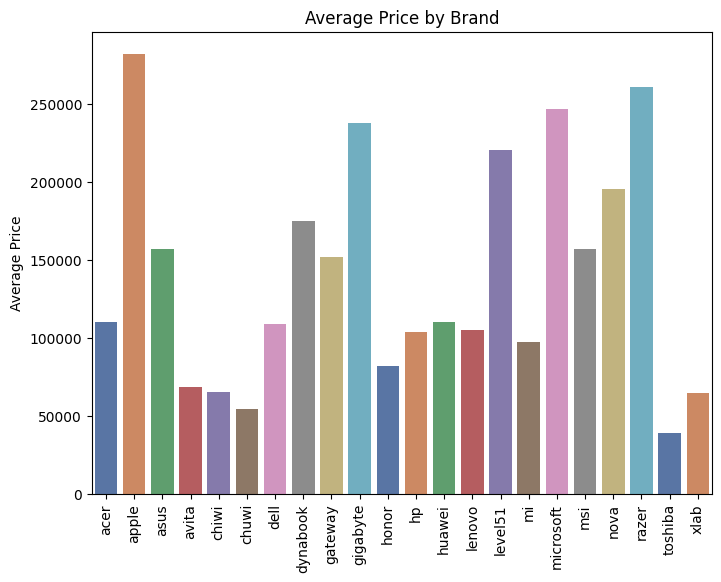

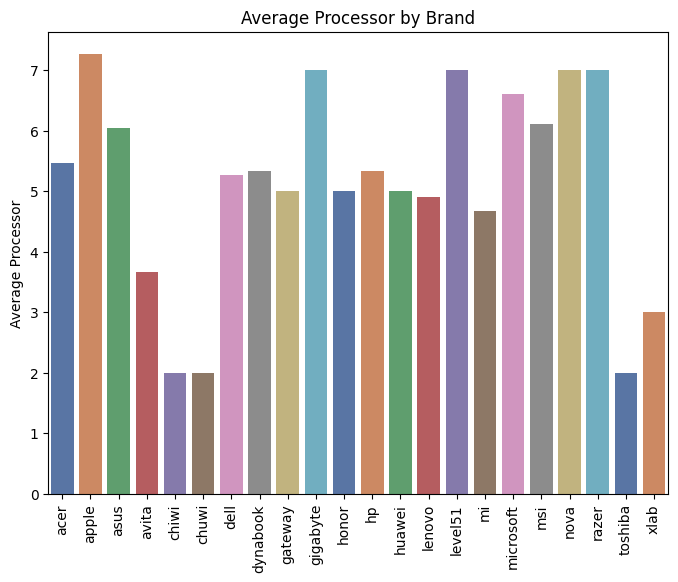

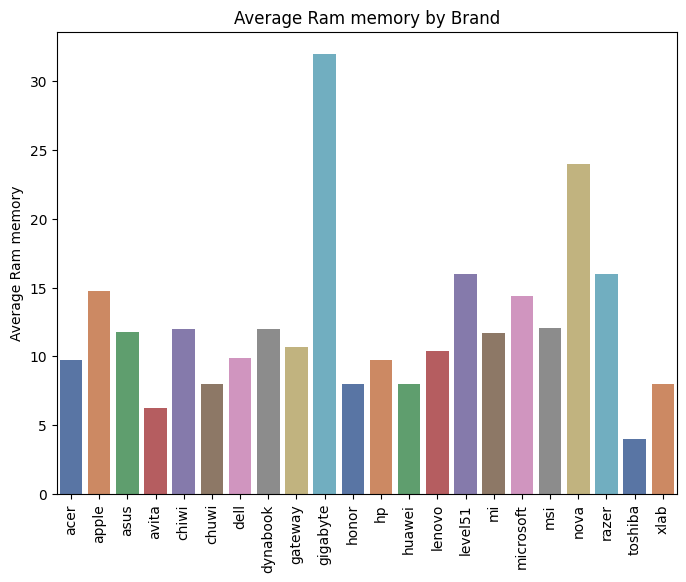

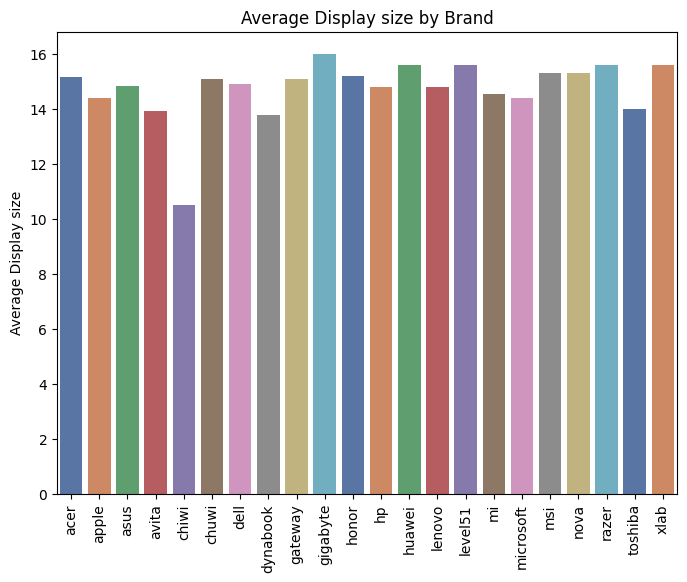

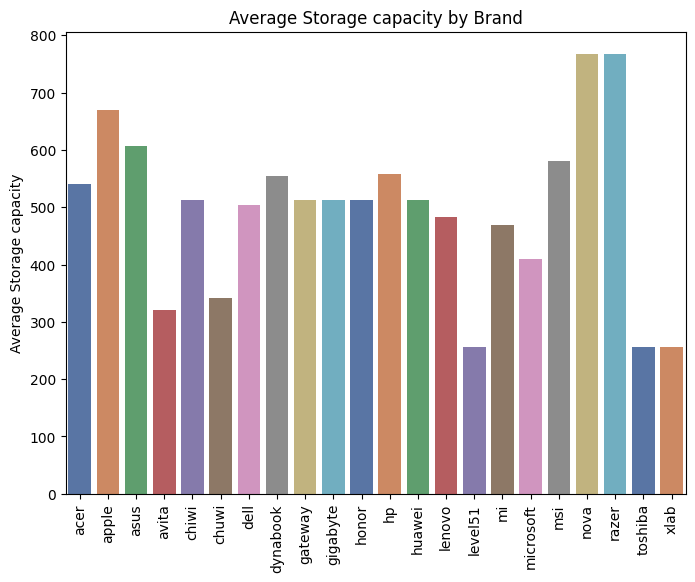

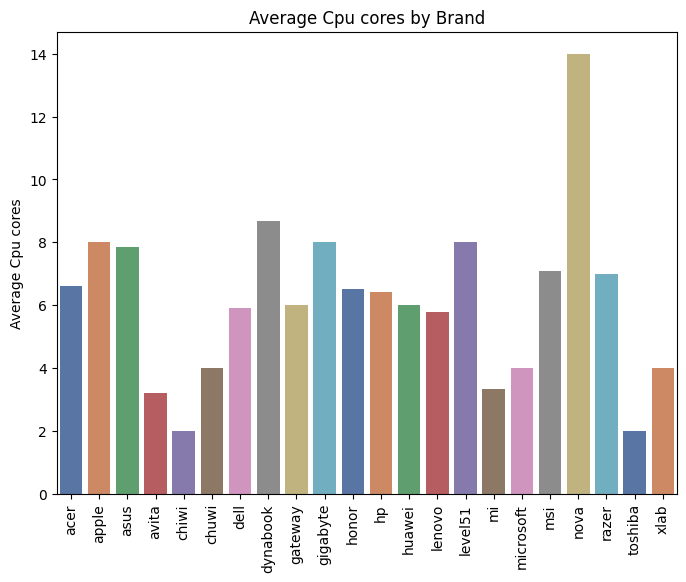

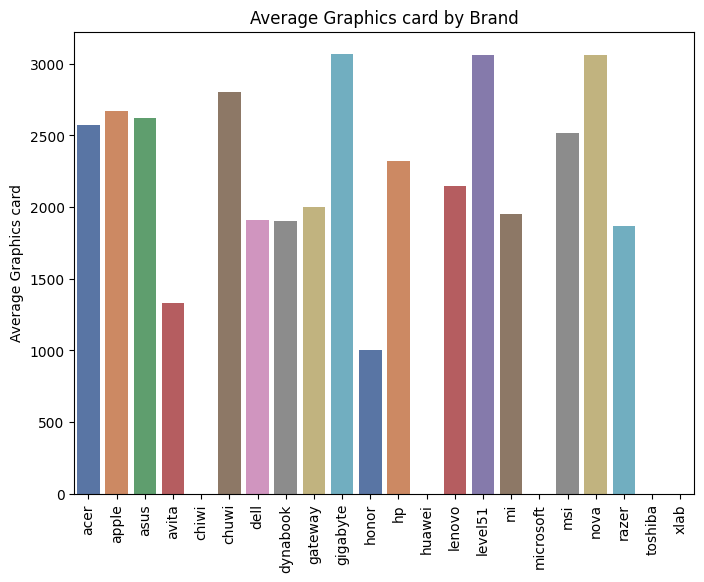

In [69]:
brand_analysis = laptop.groupby('brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'processor': 'mean',
    'ram memory': 'mean',
    'display size': 'mean',
    'storage capacity': 'mean',
    'cpu cores': 'mean',
    'graphics card': 'mean'
}).reset_index()


for i, col in enumerate(brand_cols, 1):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=brand_analysis, x='brand', y=col, hue='brand', palette='deep')
    plt.xticks(rotation=90)
    plt.title(f'Average {col.capitalize()} by Brand')
    plt.xlabel('')
    plt.ylabel(f'Average {col.capitalize()}')
    plt.show()

## Bivariate Visualization

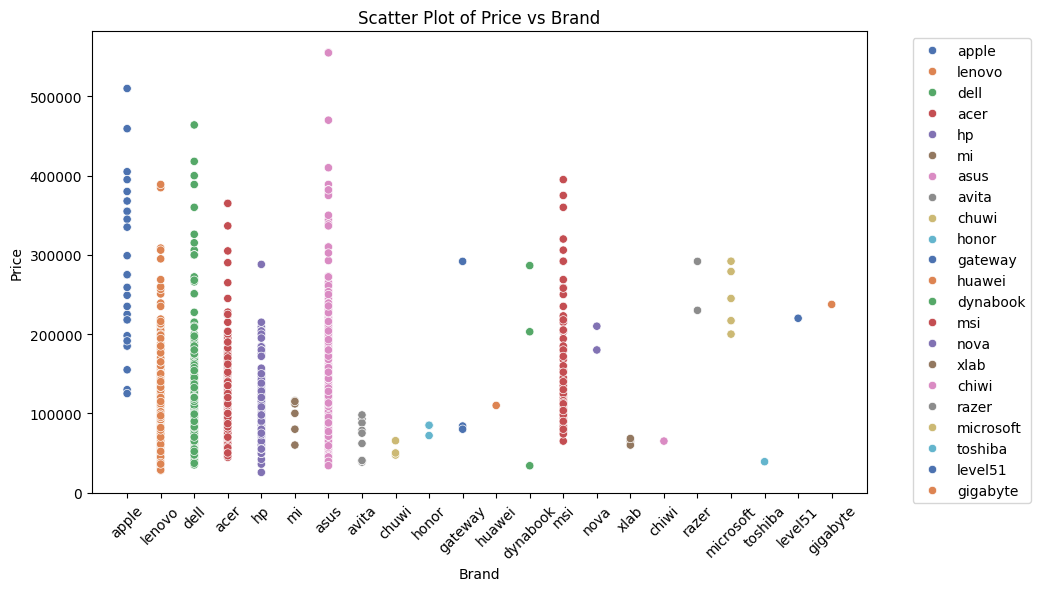

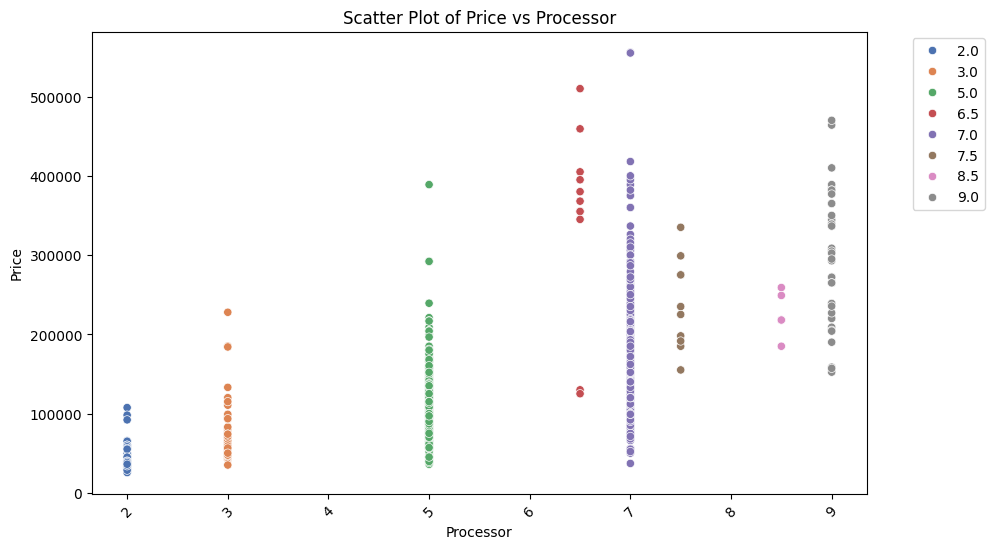

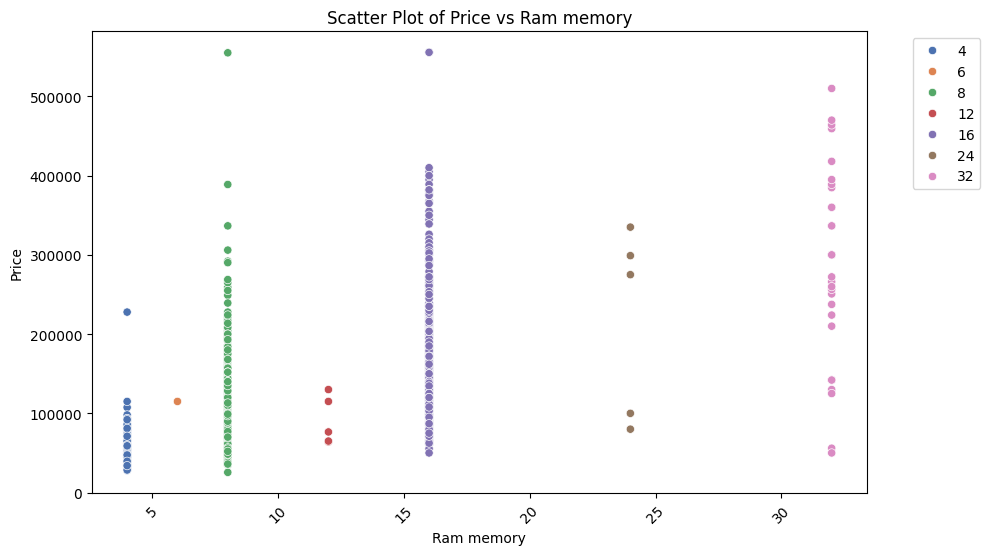

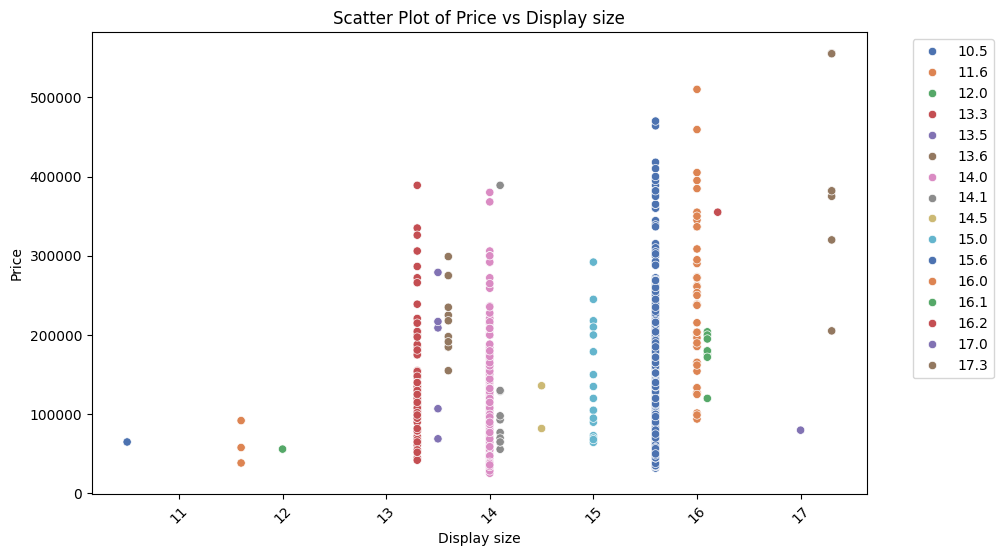

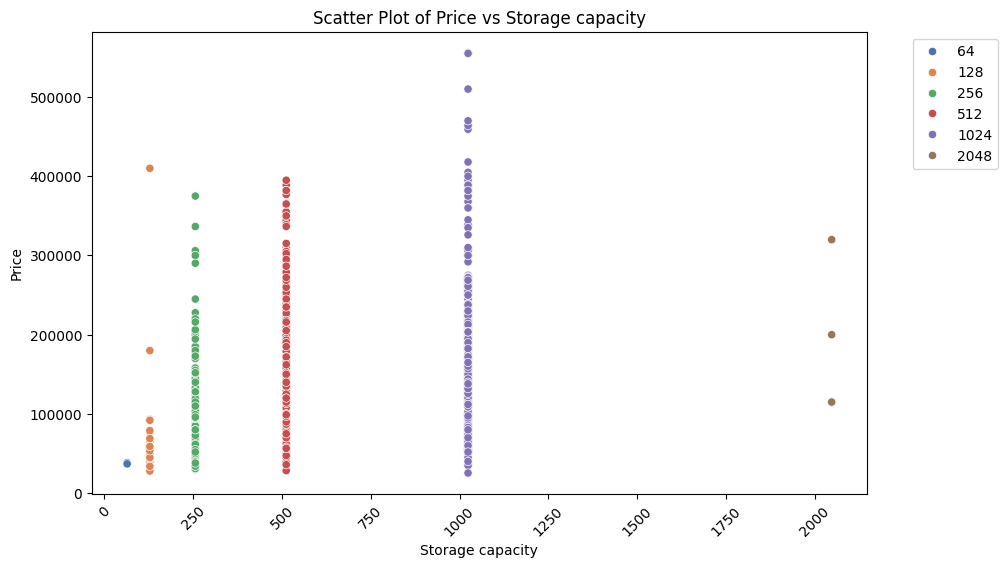

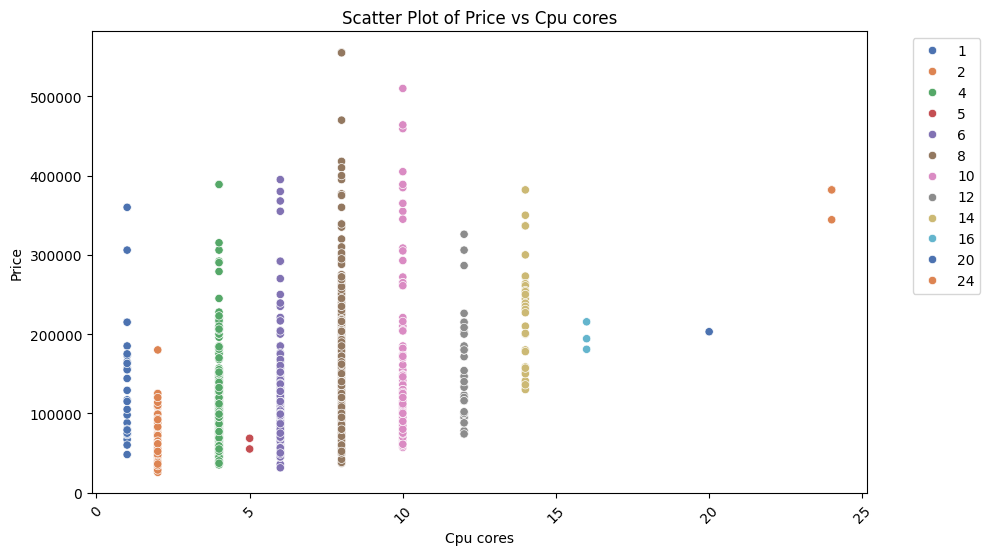

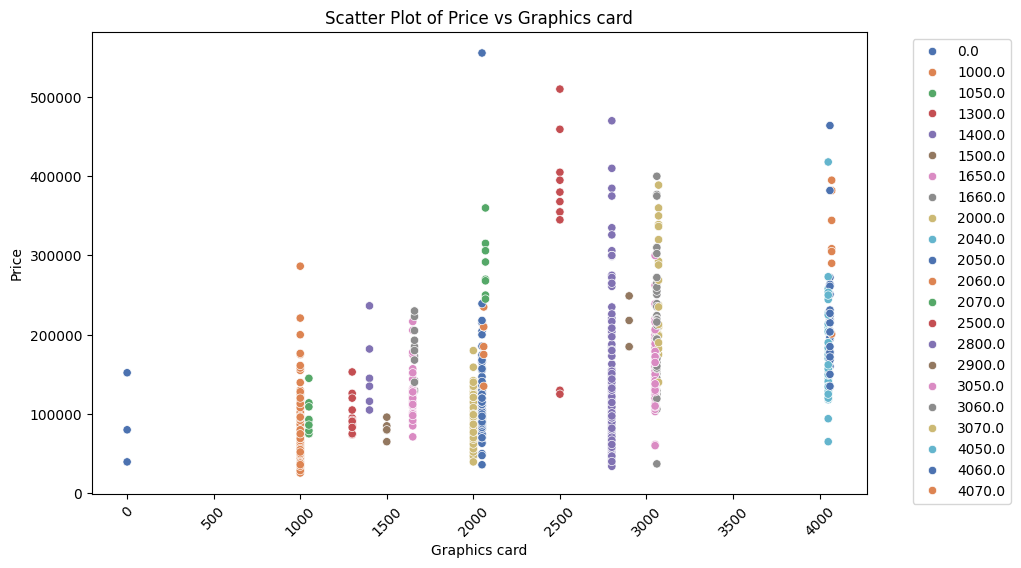

In [65]:
cols_to_plot = ['brand', 'processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=laptop, x=col, y='price', hue=col, palette='deep')
    plt.title(f'Scatter Plot of Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

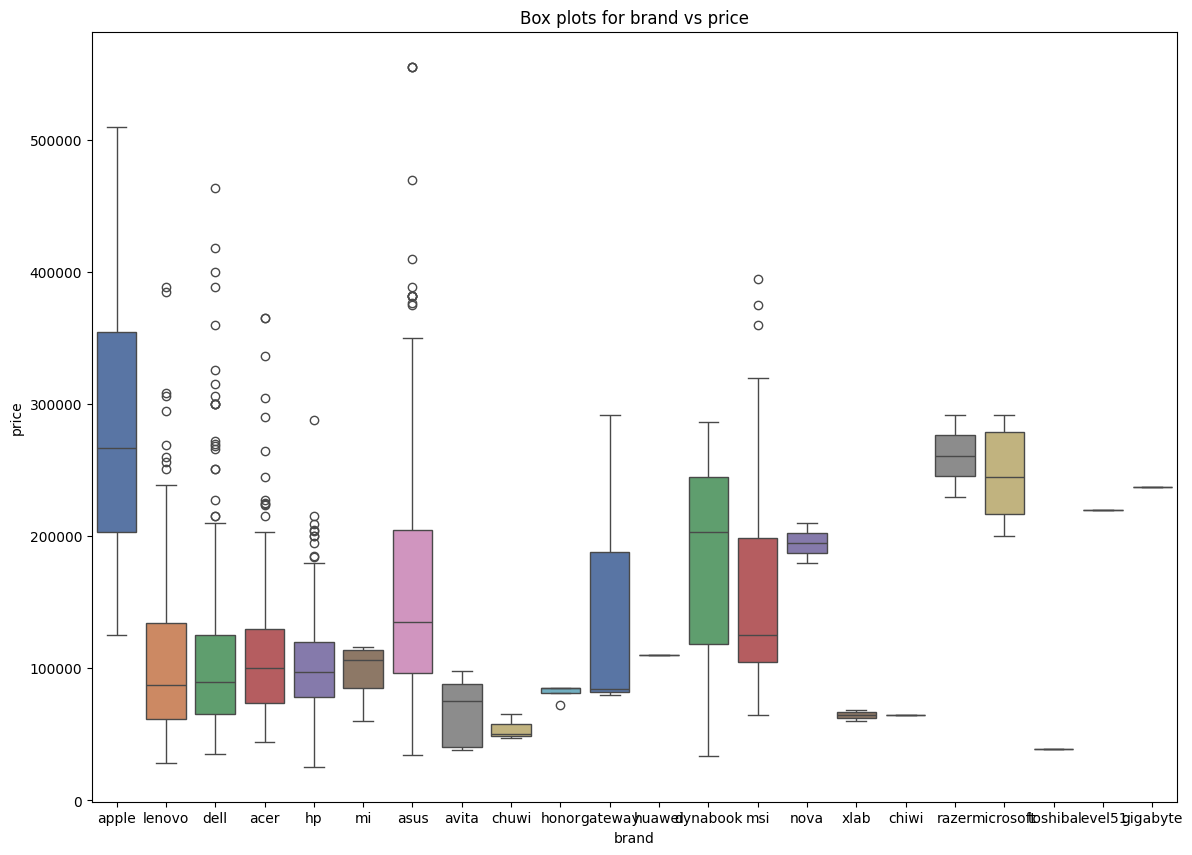

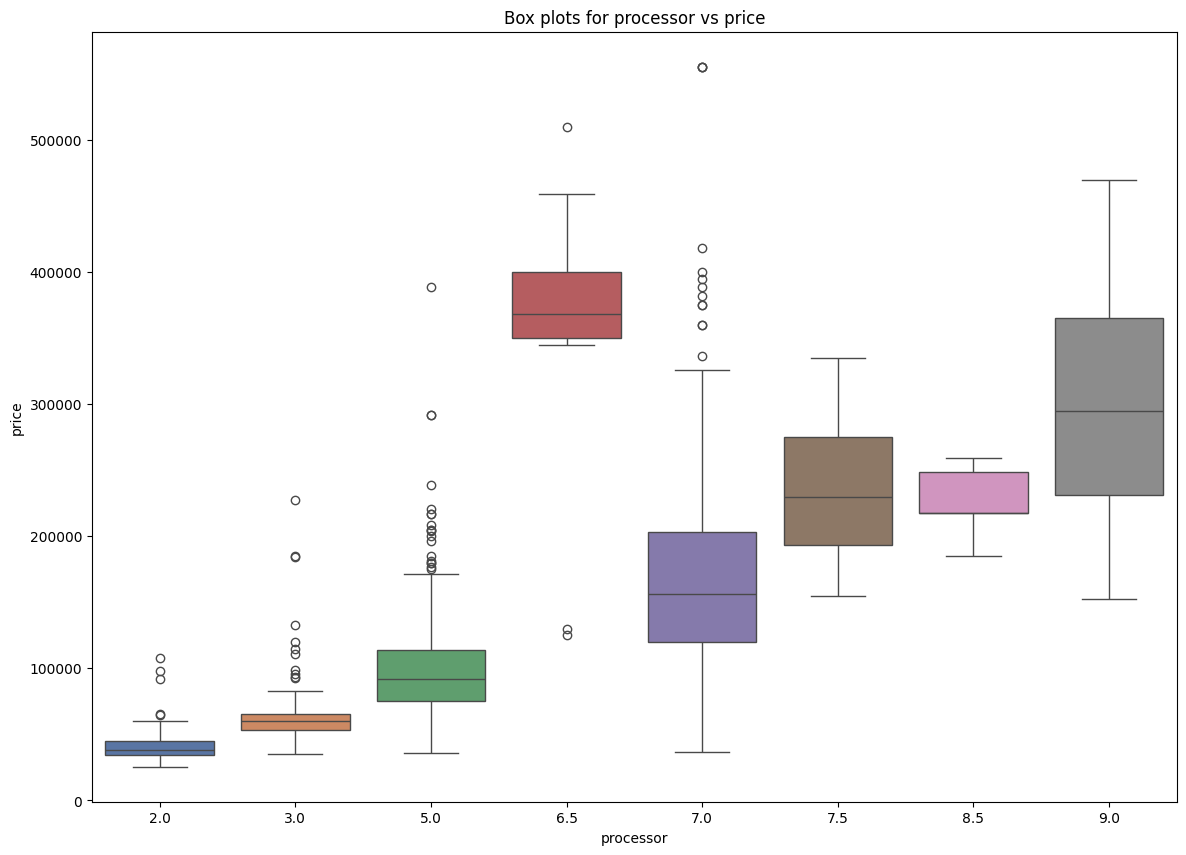

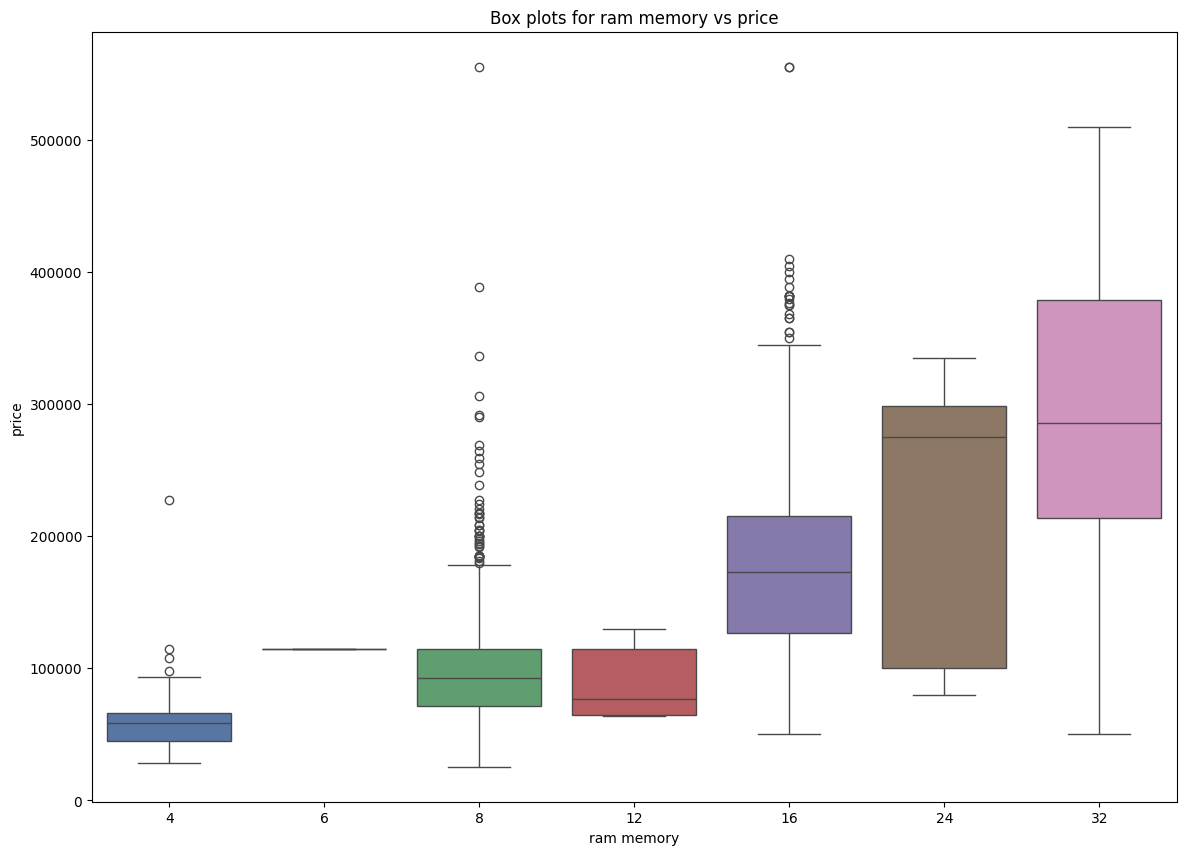

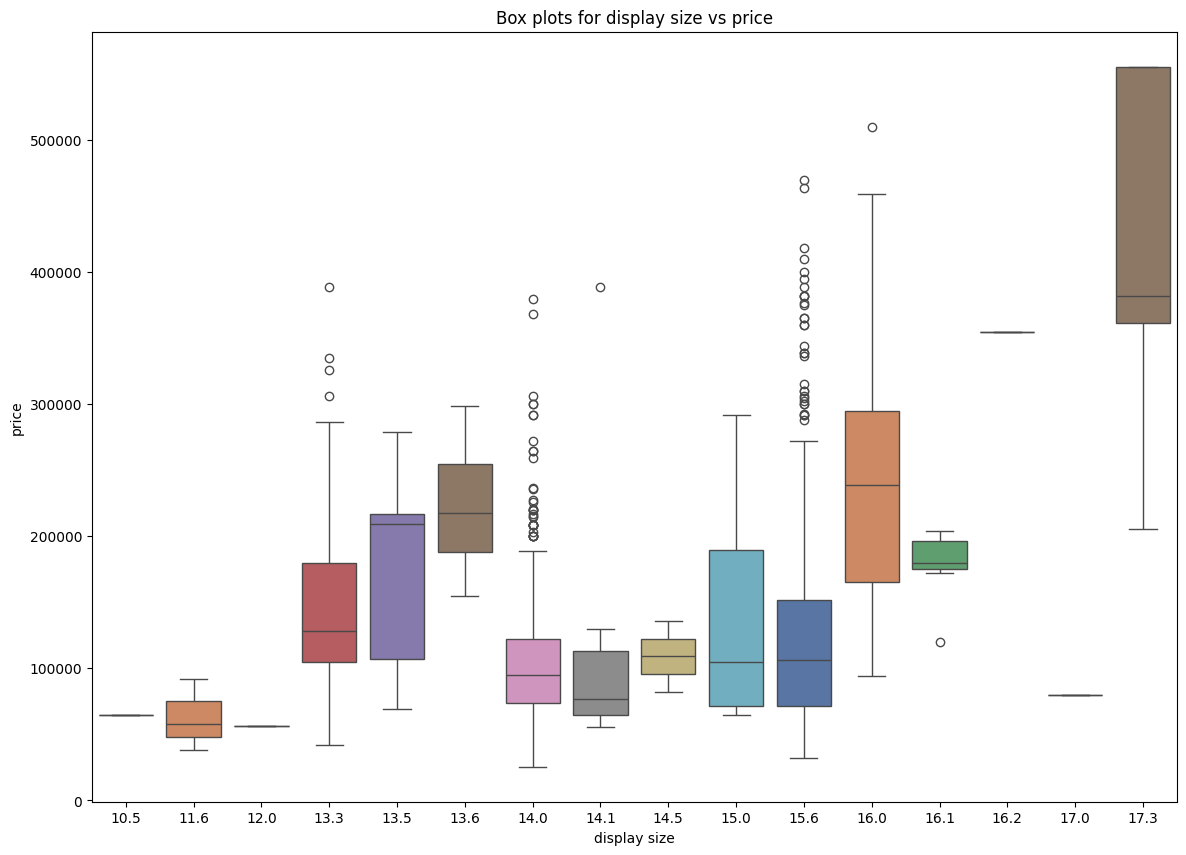

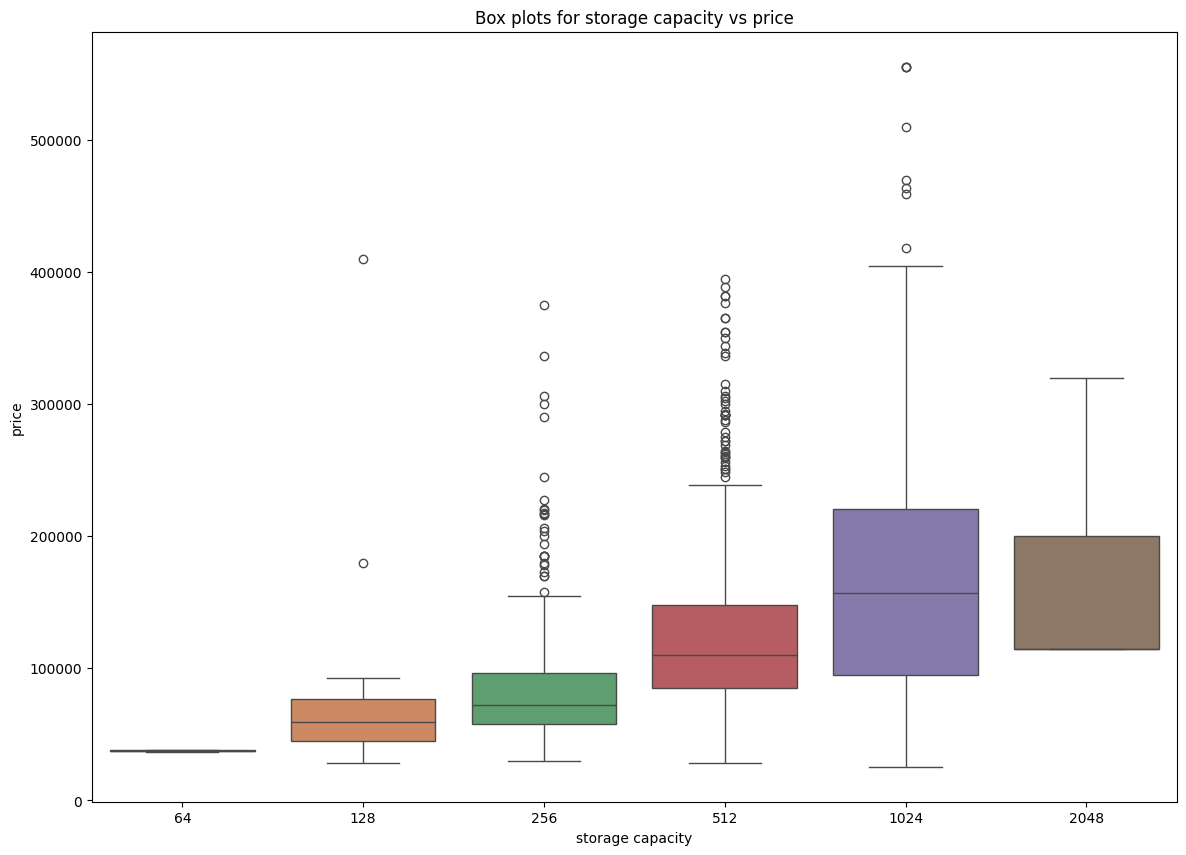

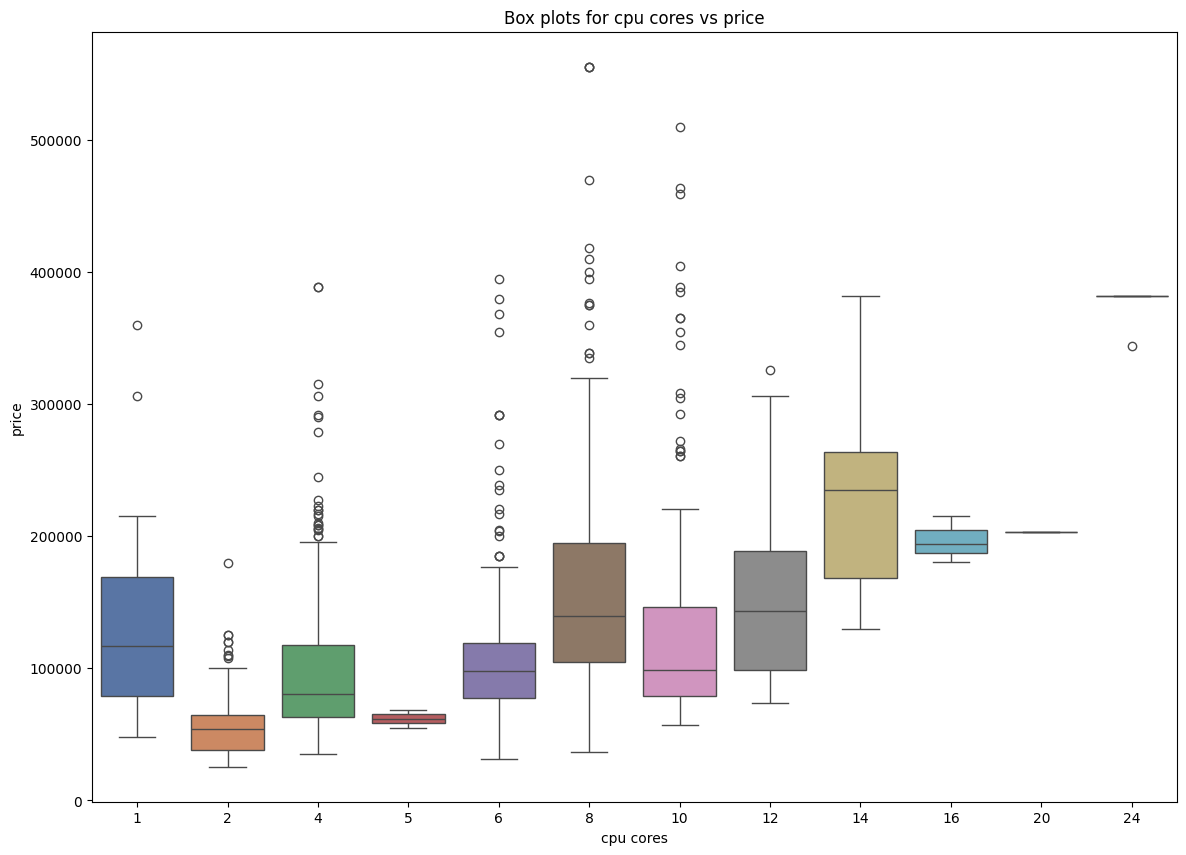

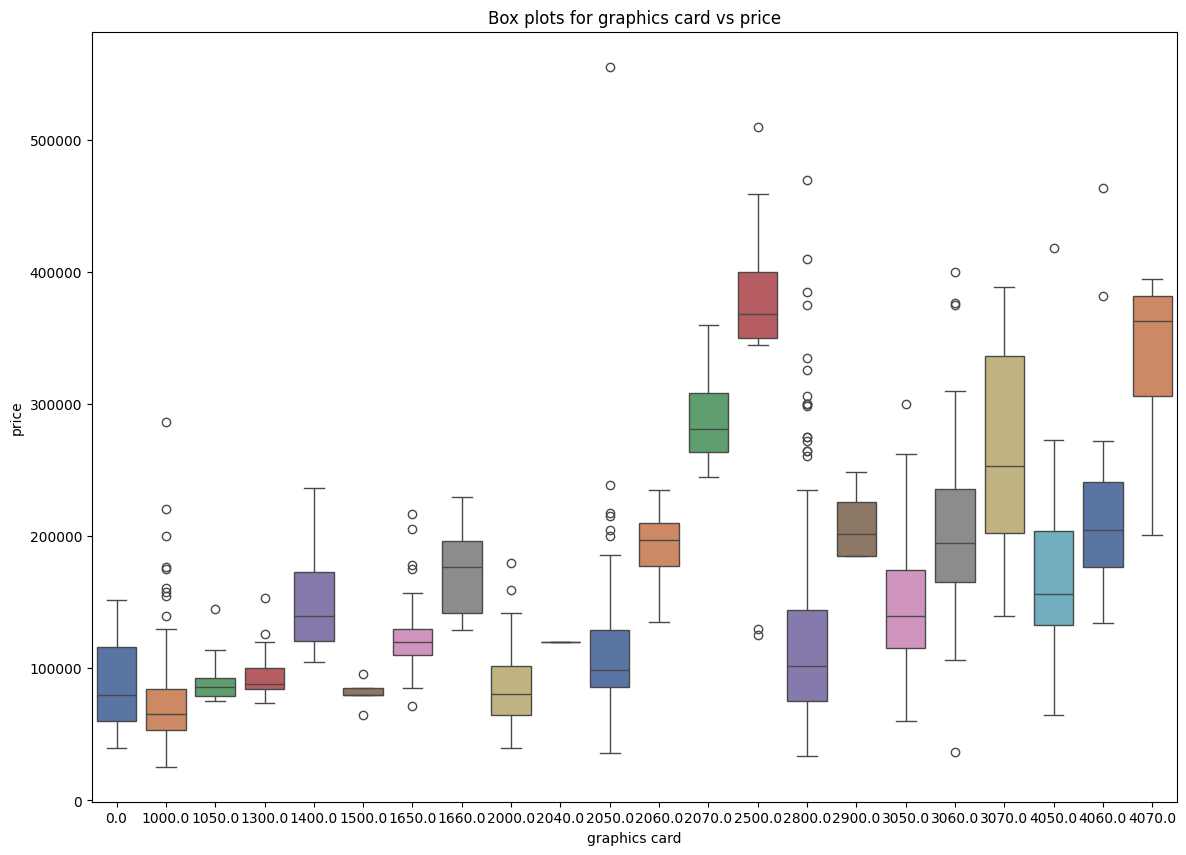

In [66]:
for col in cols_to_plot:
    plt.figure(figsize=(14,10))
    sns.boxplot(data=laptop, x=col , y='price', hue=col, palette='deep')
    plt.legend([], [], frameon=False)
    plt.title(f'Box plots for {col} vs price')
    plt.show()

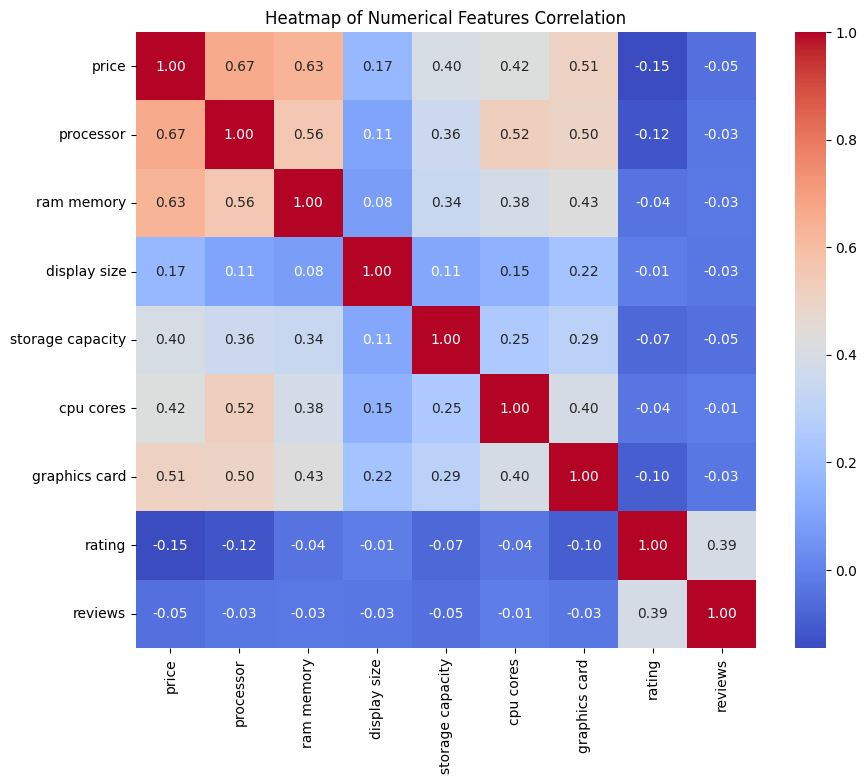

In [67]:
numerical_data = laptop[numeric_cols]
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

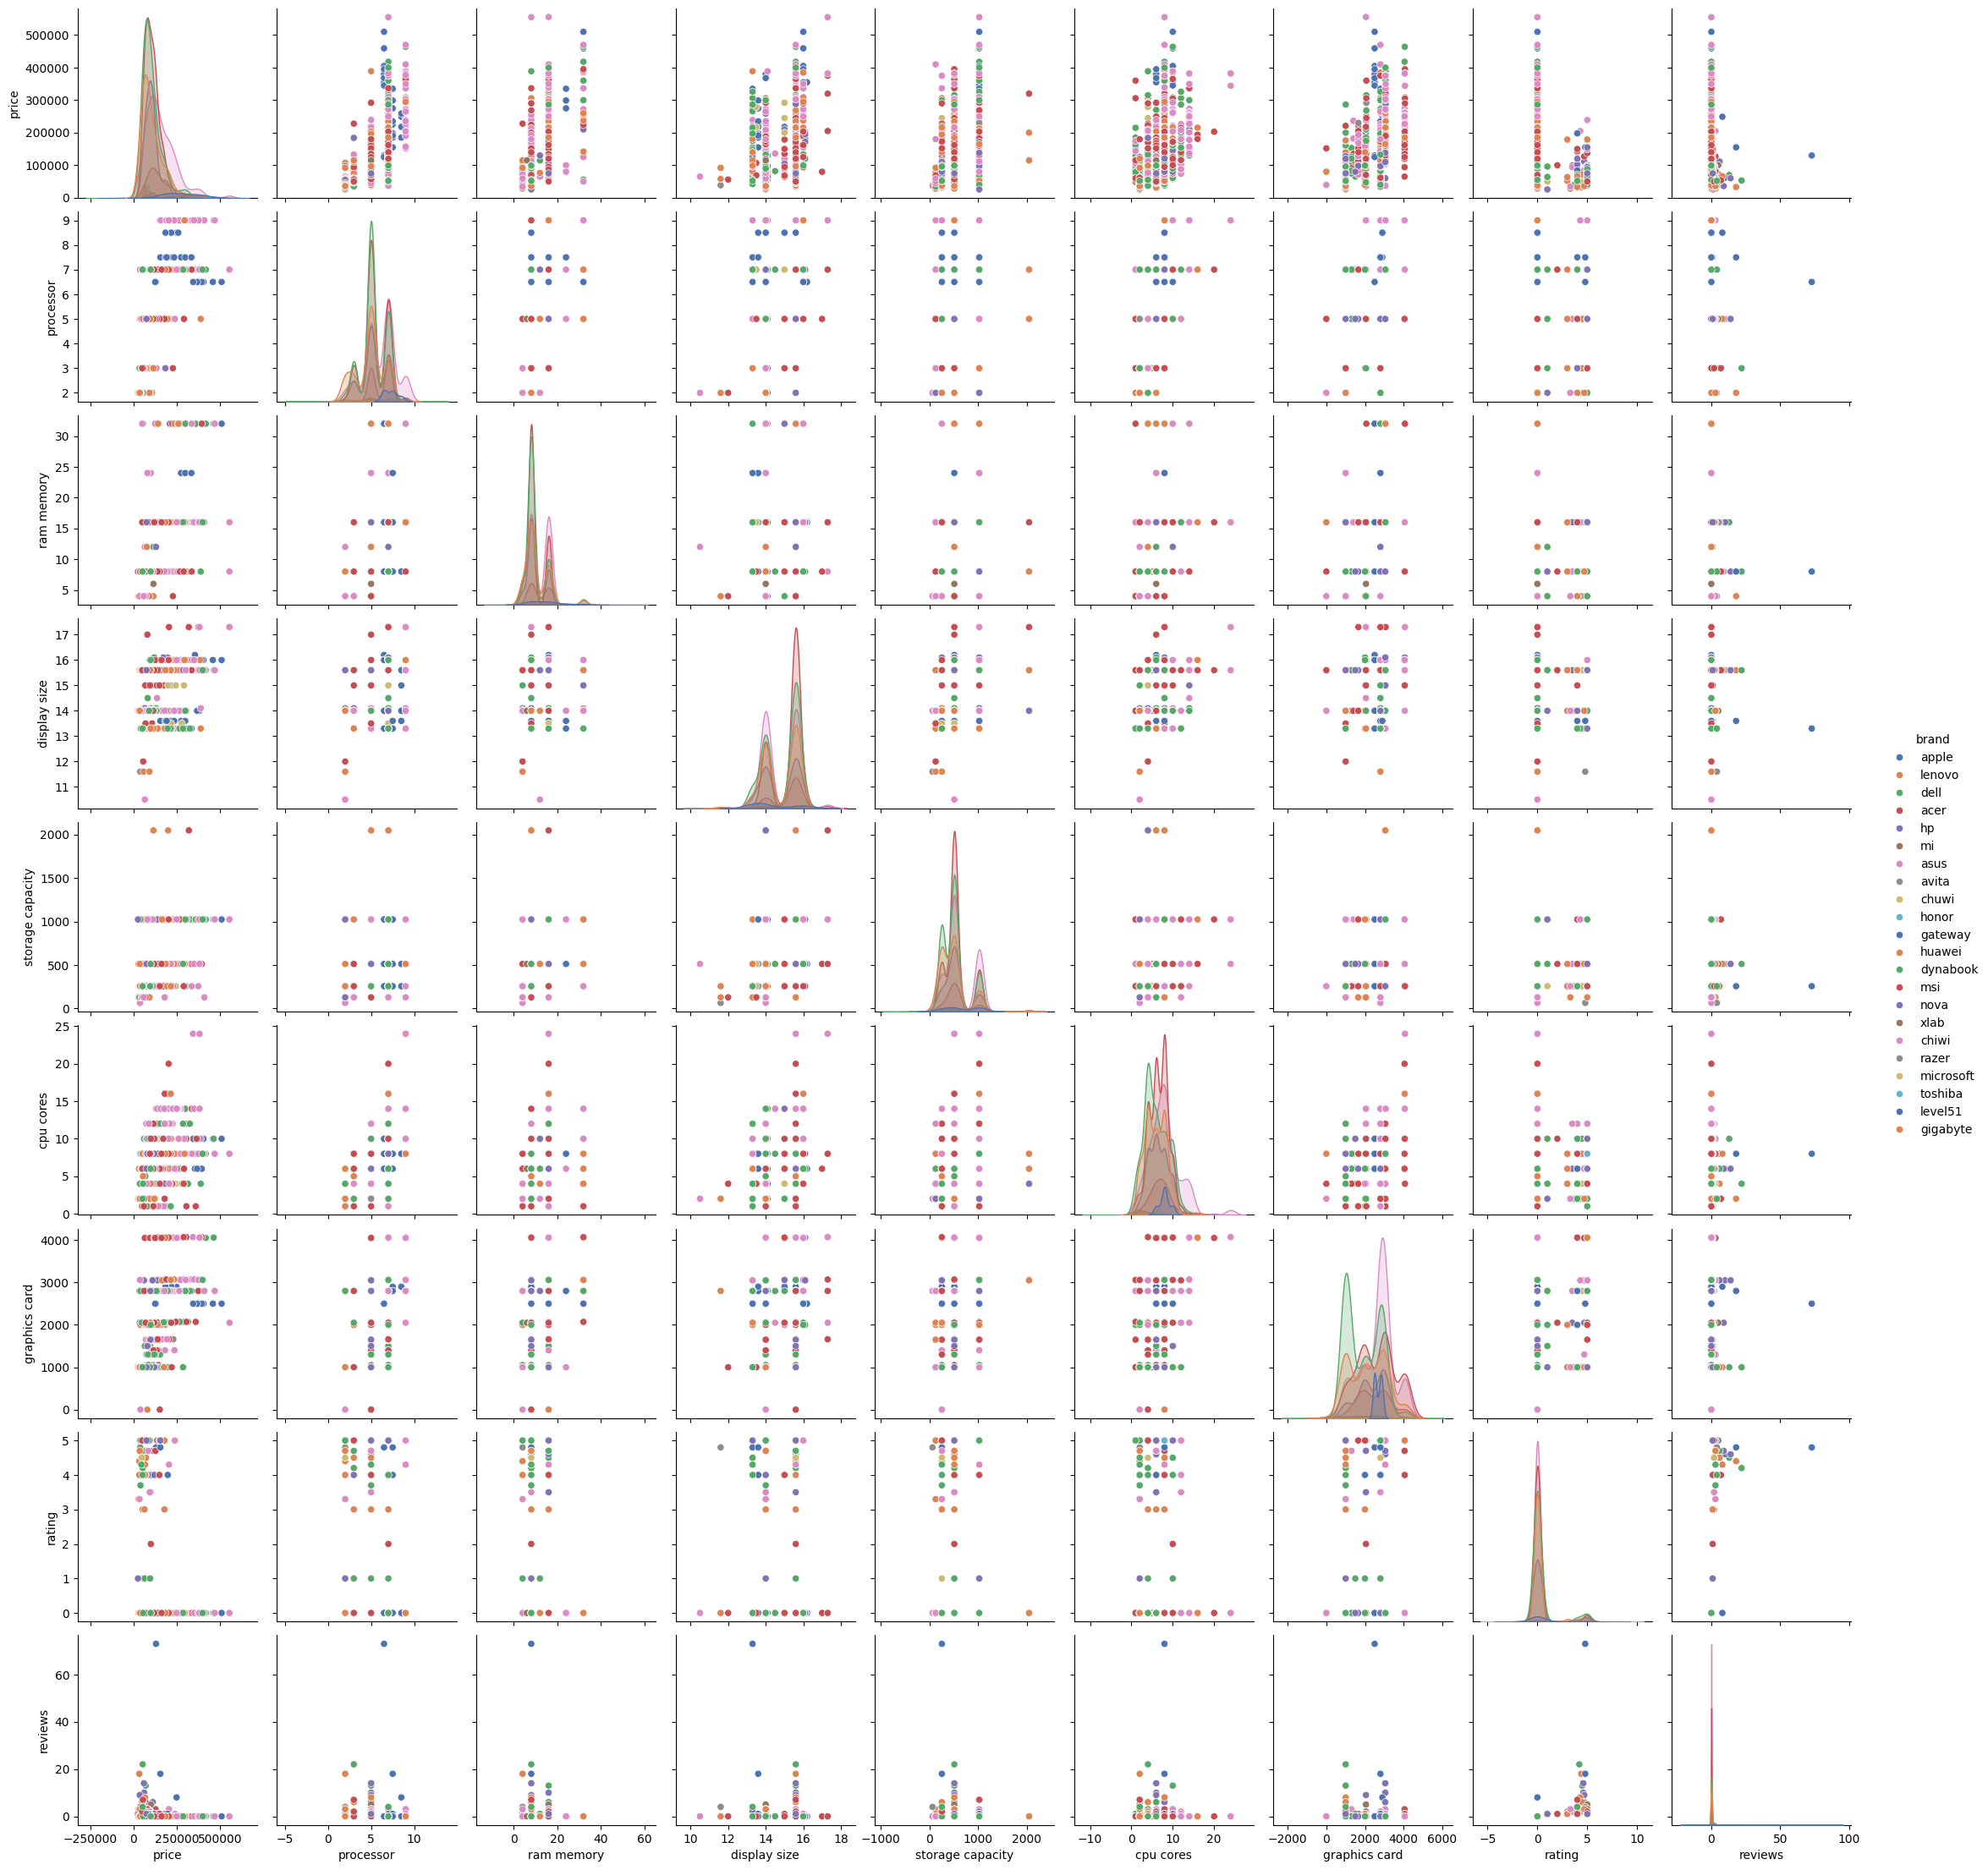

In [68]:
pairplot_data = laptop[pair_cols]
sns.pairplot(pairplot_data, hue='brand', palette='deep')
plt.show()